In [1]:
import os
import pickle
import warnings
import dateutil.parser as parser
import io

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def get_start_dates_tlg(root='Telegram data'):
    files = os.listdir(f'{root}')
    files.remove('.DS_Store')

    fig, axs = plt.subplots(nrows=len(files)//3 + 1, ncols=3, figsize=(25, 50))
    plt.subplots_adjust(hspace=0.5)
    fig.suptitle("Количество новостей по каналам по дням", fontsize=30)
    fig.tight_layout()

    for file, ax in zip(files, axs.ravel()):
        tmp = pd.read_json(f'{root}/{file}')['date'].dt.round('D')
        date = tmp.iloc[-1]
        ax.hist(tmp, bins=len(np.unique(tmp)))
        ax.set_title(f'{file[:-14]} начал работу {date}')
    plt.show()

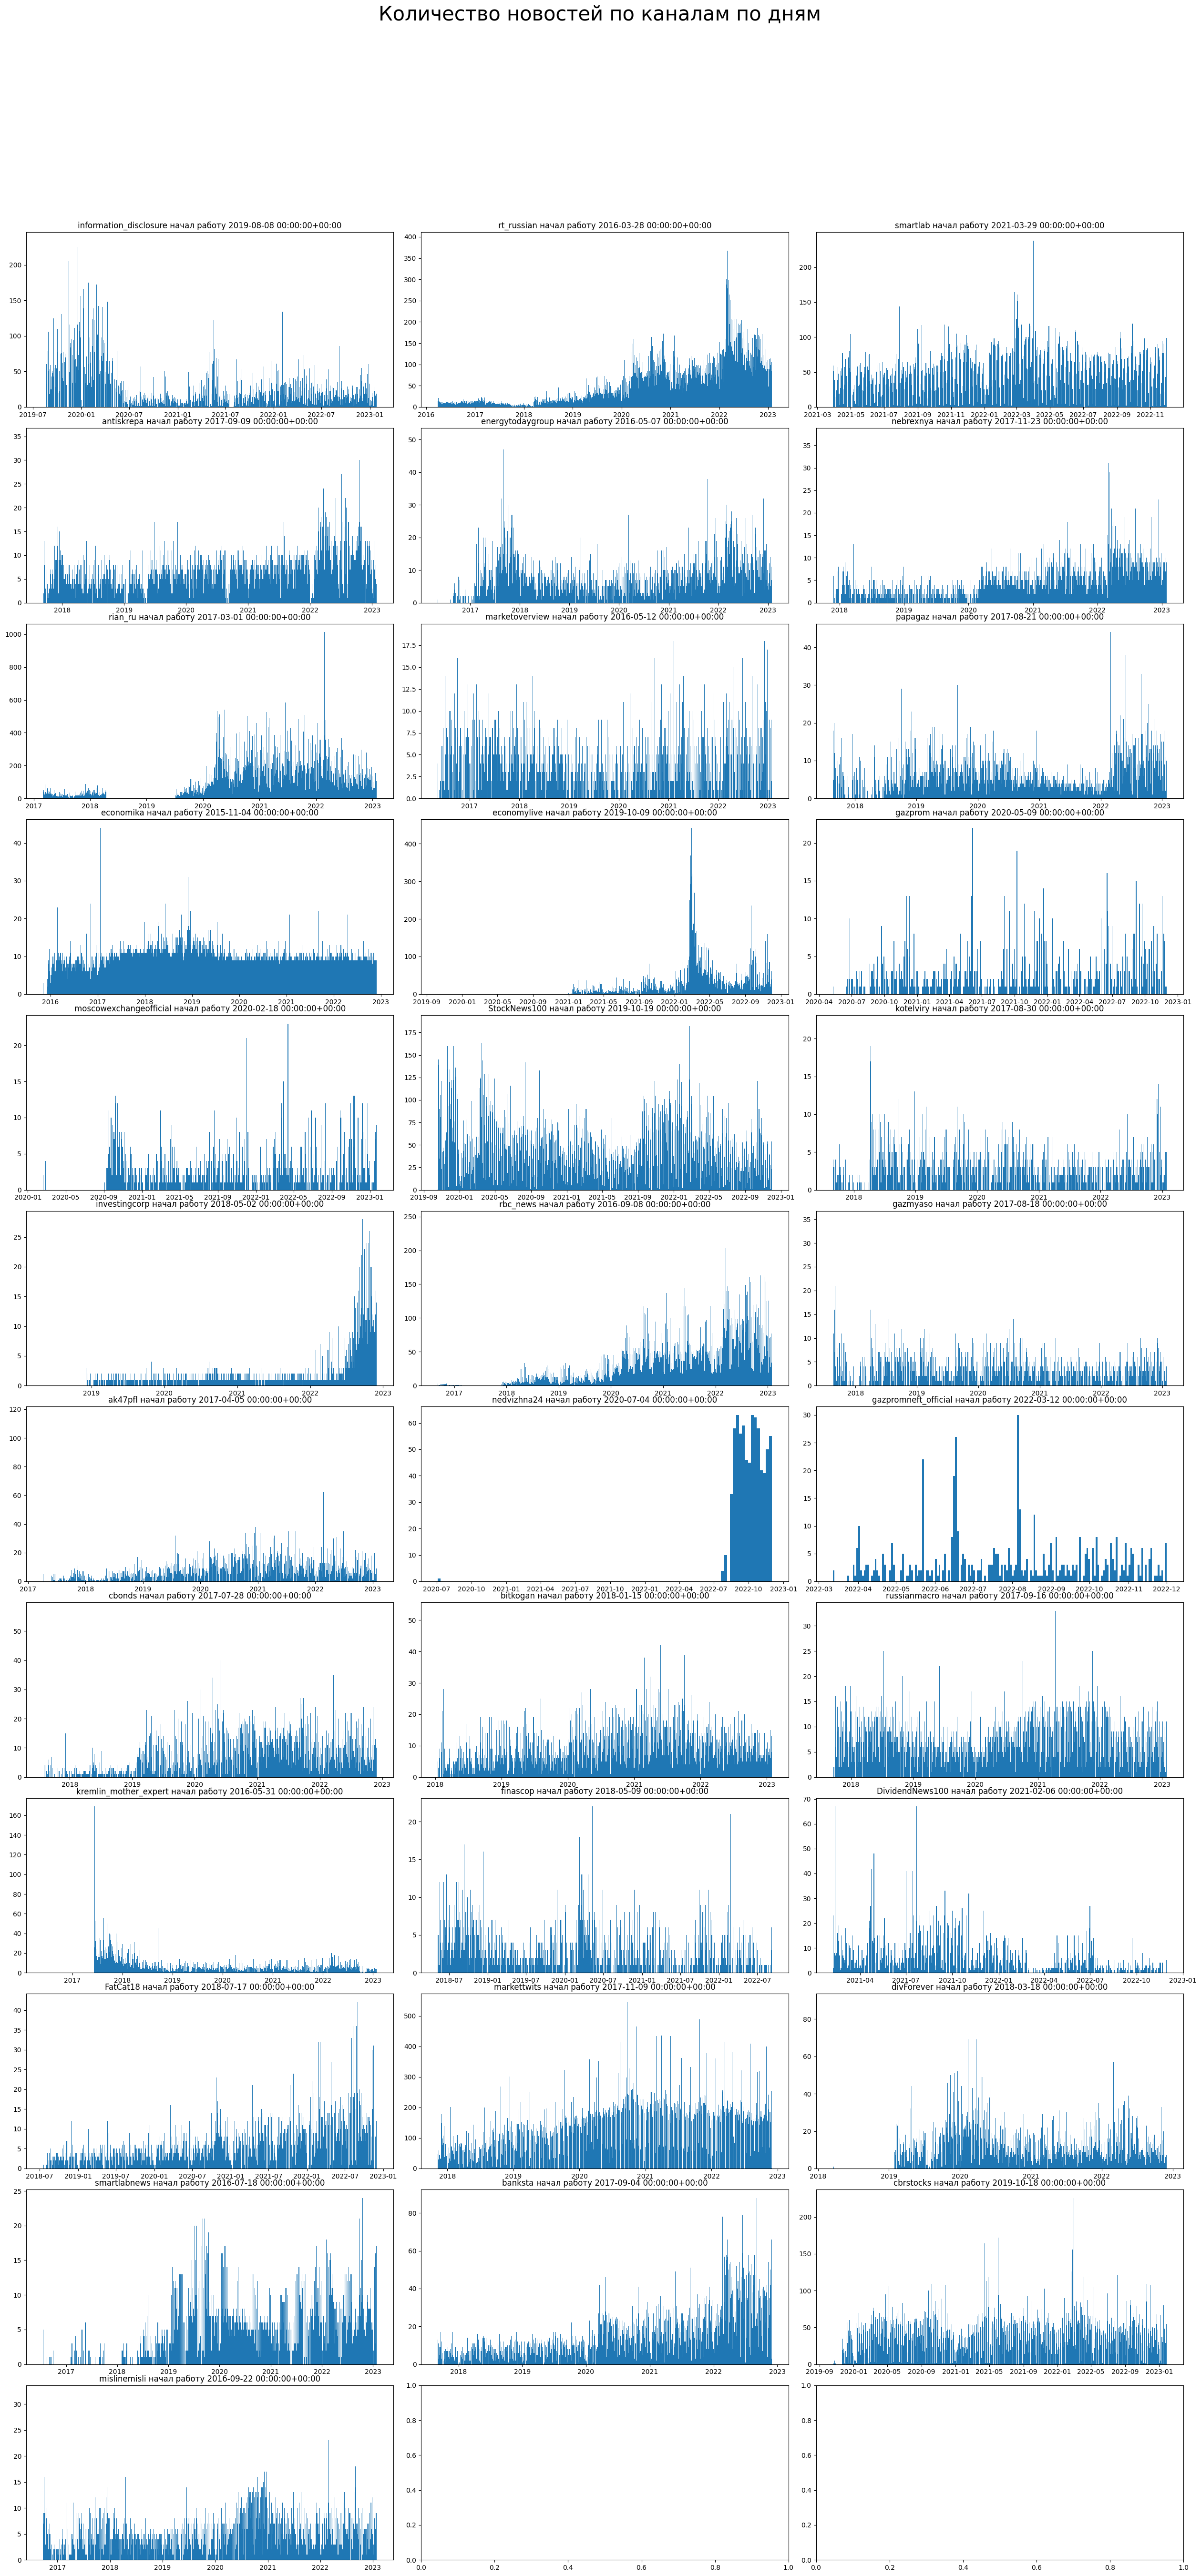

In [9]:
get_start_dates_tlg()

In [13]:
def get_dates_tlg(root='Telegram data'):
    files = os.listdir(f'{root}')
    files.remove('.DS_Store')
    dates = pd.Series()
    for file in files:
        tmp = pd.to_datetime(pd.read_json(f'{root}/{file}')['date']).dt.round('D')
        dates = pd.concat([dates, tmp], axis=0)
    
    return dates

In [14]:
dates_tg = get_dates_tlg()

/var/folders/m6/2n44mlkj7nbdwb651dd78pwc0000gn/T/ipykernel_835/1737738581.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dates = pd.Series()


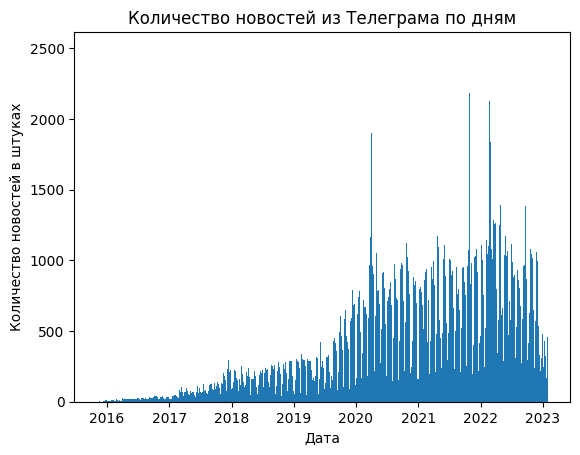

In [15]:
plt.hist(dates_tg, bins=len(np.unique(dates_tg)))
plt.xlabel('Дата')
plt.ylabel('Количество новостей в штуках')
plt.title('Количество новостей из Телеграма по дням')
plt.show()

In [13]:
def dates_news(roots):
    fig, axs = plt.subplots(nrows=len(roots)//3 + 1, ncols=3, figsize=(25, 50))
    plt.subplots_adjust(hspace=0.5)
    fig.suptitle("Количество новостей по категориям изданий", fontsize=30)
    fig.tight_layout()

    for root, ax in zip(roots, axs.ravel()):
        date = pd.read_csv(f'{root}/{root}.csv')['date']
        date = pd.to_datetime(date).dt.round('D')
        
        ax.hist(date, bins=len(np.unique(date)))
        ax.set_title(f'{root}')

    plt.show()

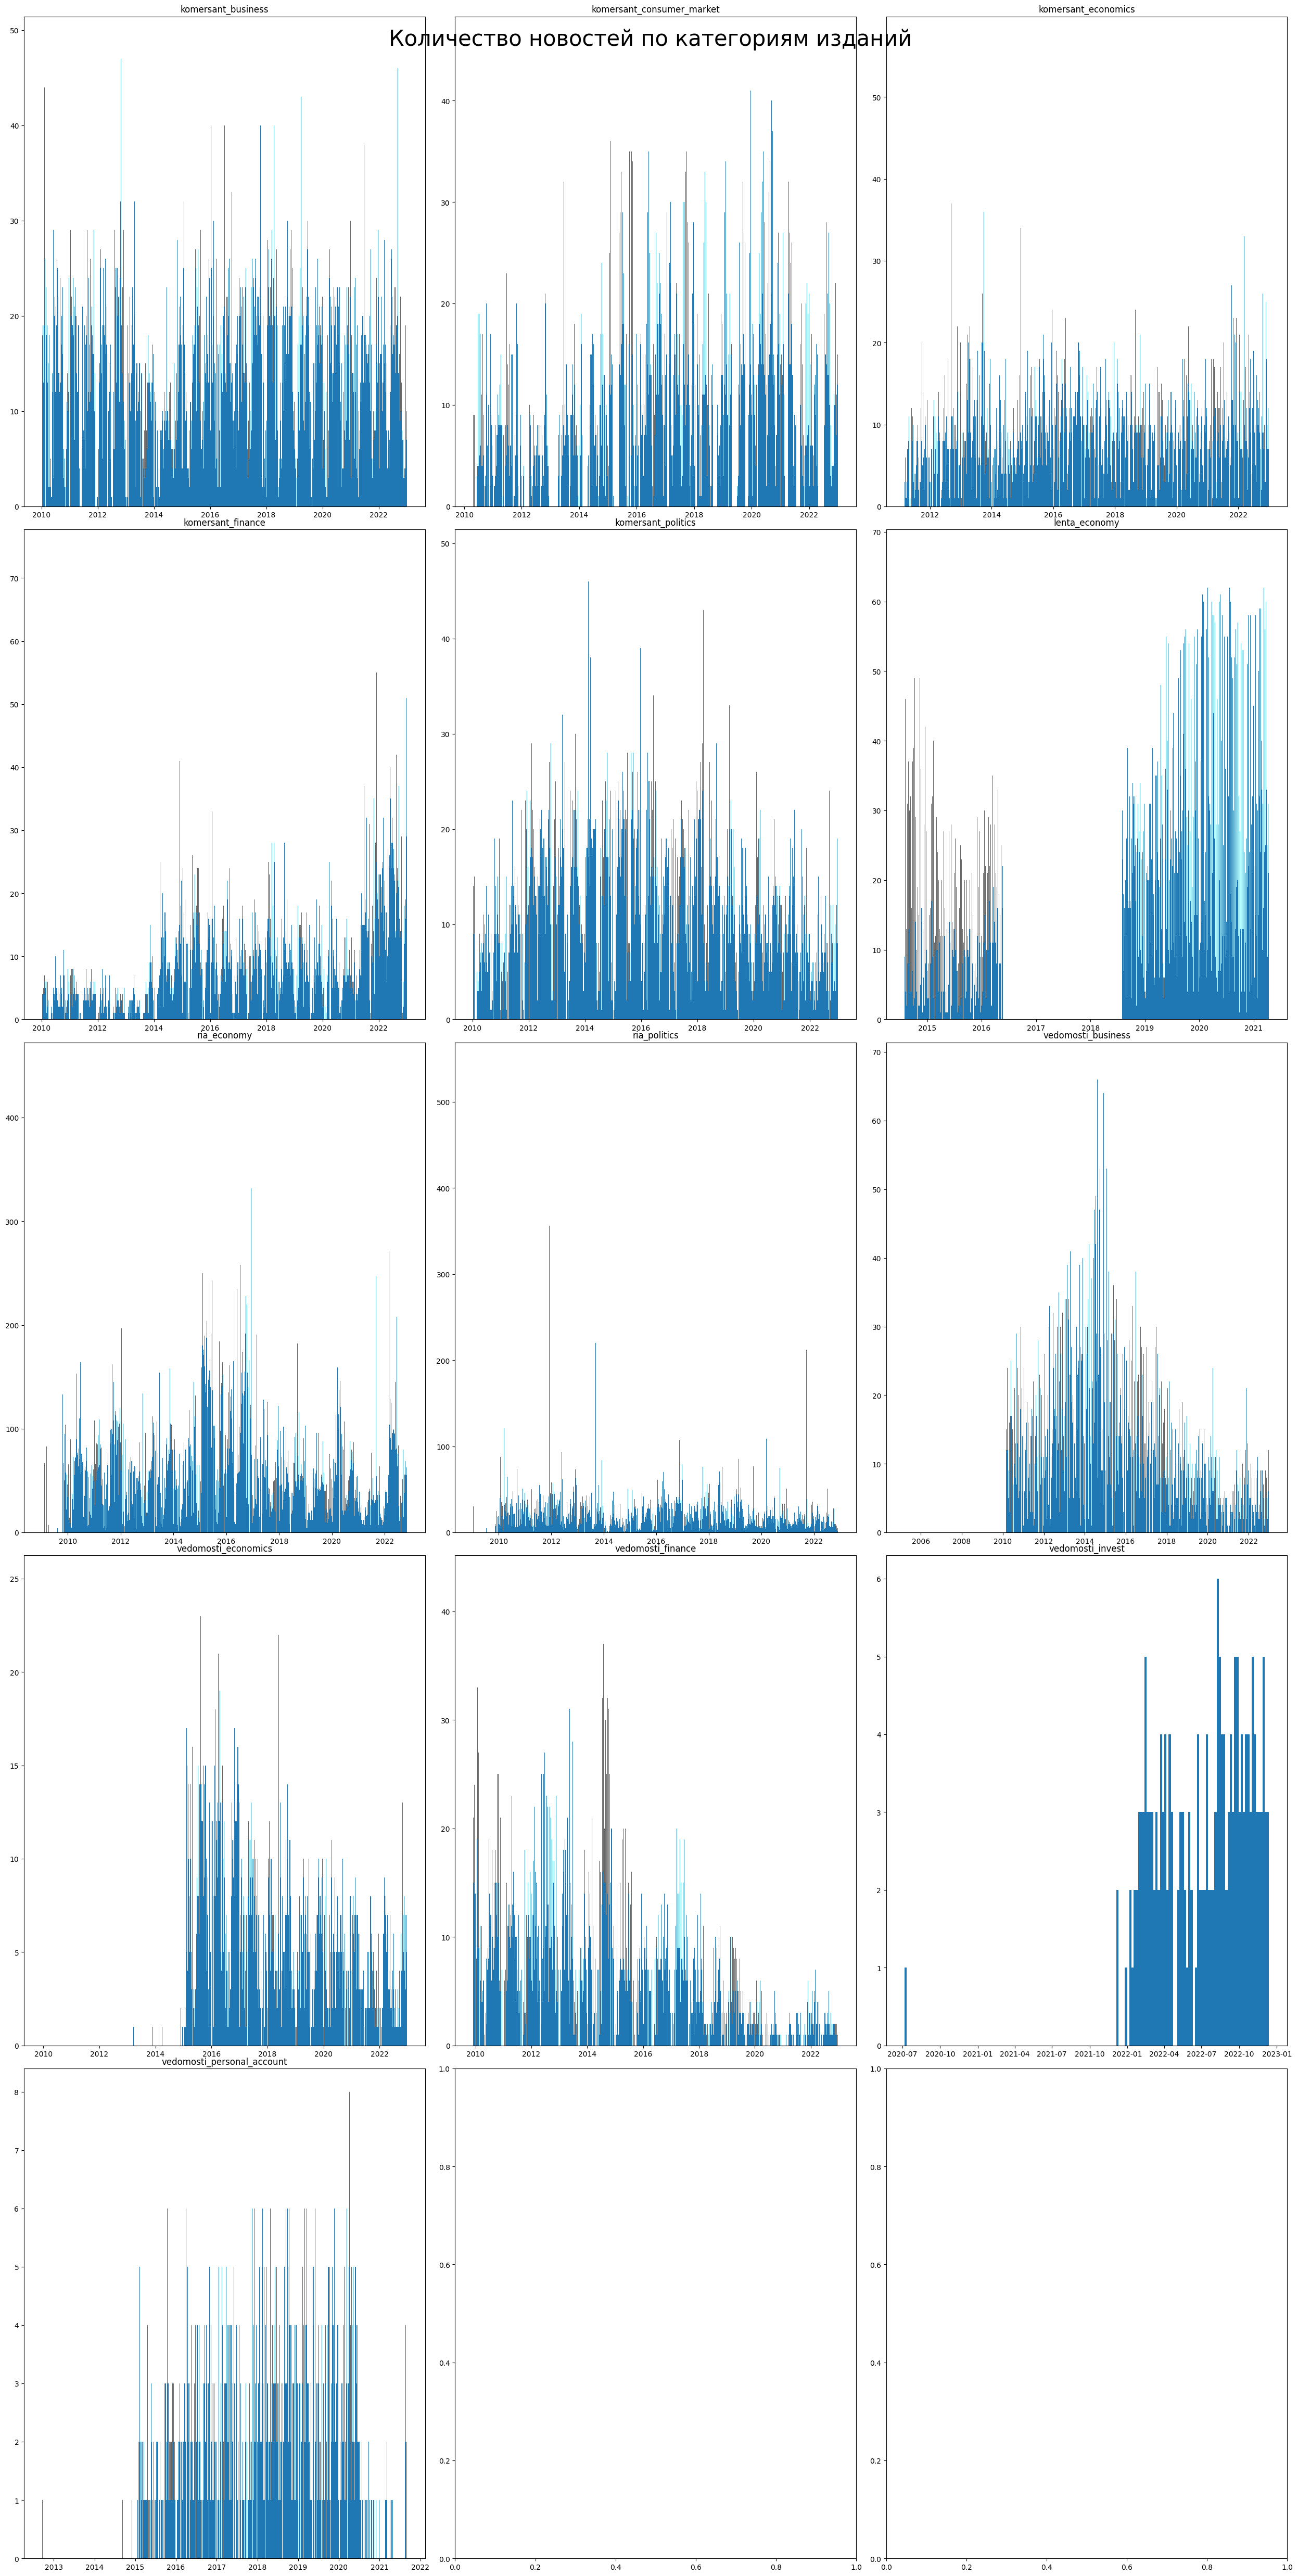

In [14]:
roots = ['komersant_business', 'komersant_consumer_market', 'komersant_economics', 'komersant_finance', 'komersant_politics',
        'lenta_economy', 'ria_economy', 'ria_politics',
        'vedomosti_business', 'vedomosti_economics', 'vedomosti_finance', 'vedomosti_invest', 'vedomosti_personal_account']

dates_news(roots)

In [20]:
def avg_time_news(roots):
    for root in roots:
        date = pd.read_csv(f'{root}/{root}.csv')['date']
        date = pd.to_datetime(date)
        delta = (date - date.shift(1)).dt.seconds 
        avg_time = delta.mean() / 60
        max_time = delta.max() / 60
        min_time = delta.min() / 60
        print(root)
        print(f'Среднее время — {round(avg_time,2)} минут')
        print(f'Минимальное время — {round(min_time,2)} минут')
        print(f'Максимальное время — {round(max_time,2)} минут')

avg_time_news(roots)

komersant_business
Среднее время — 98.79 минут
Минимальное время — 0.0 минут
Максимальное время — 1436.75 минут
komersant_consumer_market
Среднее время — 134.87 минут
Минимальное время — 0.0 минут
Максимальное время — 1439.98 минут
komersant_economics
Среднее время — 149.59 минут
Минимальное время — 0.0 минут
Максимальное время — 1438.98 минут
komersant_finance
Среднее время — 141.09 минут
Минимальное время — 0.0 минут
Максимальное время — 1439.6 минут
komersant_politics
Среднее время — 118.33 минут
Минимальное время — 0.0 минут
Максимальное время — 1439.98 минут
lenta_economy
Среднее время — 90.51 минут
Минимальное время — 0.0 минут
Максимальное время — 1431.0 минут
ria_economy
Среднее время — 23.67 минут
Минимальное время — 0.0 минут
Максимальное время — 1439.0 минут
ria_politics
Среднее время — 63.93 минут
Минимальное время — 0.0 минут
Максимальное время — 1431.0 минут
vedomosti_business
Среднее время — 138.52 минут
Минимальное время — 0.0 минут
Максимальное время — 1439.75 минут
ve

In [25]:
def avg_time_tg():
    roots = os.listdir('Telegram prep')
    roots.remove('.DS_Store')
    roots.remove('messages')
    for root in roots:
        date = pd.read_csv(f'Telegram prep/{root}')['date']
        date = pd.to_datetime(date)
        delta = (date - date.shift(1)).dt.seconds 
        avg_time = delta.mean() / 60
        max_time = delta.max() / 60
        min_time = delta.min() / 60
        print(root[:-4])
        print(f'Среднее время — {round(avg_time,2)} минут')
        print(f'Минимальное время — {round(min_time,2)} минут')
        print(f'Максимальное время — {round(max_time,2)} минут')

avg_time_tg()

markettwits
Среднее время — 10.77 минут
Минимальное время — 0.0 минут
Максимальное время — 1425.25 минут


/var/folders/m6/2n44mlkj7nbdwb651dd78pwc0000gn/T/ipykernel_931/4184756239.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  date = pd.read_csv(f'Telegram prep/{root}')['date']


rian_ru
Среднее время — 12.92 минут
Минимальное время — 0.0 минут
Максимальное время — 1251.95 минут


/var/folders/m6/2n44mlkj7nbdwb651dd78pwc0000gn/T/ipykernel_931/4184756239.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  date = pd.read_csv(f'Telegram prep/{root}')['date']


information_disclosure
Среднее время — 48.12 минут
Минимальное время — 0.0 минут
Максимальное время — 1439.98 минут
moscowexchangeofficial
Среднее время — 419.59 минут
Минимальное время — 0.0 минут
Максимальное время — 1439.12 минут


/var/folders/m6/2n44mlkj7nbdwb651dd78pwc0000gn/T/ipykernel_931/4184756239.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  date = pd.read_csv(f'Telegram prep/{root}')['date']


smartlab
Среднее время — 27.09 минут
Минимальное время — 0.0 минут
Максимальное время — 1430.42 минут


/var/folders/m6/2n44mlkj7nbdwb651dd78pwc0000gn/T/ipykernel_931/4184756239.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  date = pd.read_csv(f'Telegram prep/{root}')['date']


cbonds
Среднее время — 168.9 минут
Минимальное время — 0.0 минут
Максимальное время — 1439.8 минут
economylive
Среднее время — 60.07 минут
Минимальное время — 0.0 минут
Максимальное время — 1430.83 минут
cbrstocks
Среднее время — 33.84 минут
Минимальное время — 0.0 минут
Максимальное время — 1438.82 минут
gazmyaso
Среднее время — 364.18 минут
Минимальное время — 0.0 минут
Максимальное время — 1432.52 минут
divForever
Среднее время — 123.85 минут
Минимальное время — 0.0 минут
Максимальное время — 1436.1 минут
FatCat18
Среднее время — 202.12 минут
Минимальное время — 0.0 минут
Максимальное время — 1439.8 минут


/var/folders/m6/2n44mlkj7nbdwb651dd78pwc0000gn/T/ipykernel_931/4184756239.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  date = pd.read_csv(f'Telegram prep/{root}')['date']


kremlin_mother_expert
Среднее время — 200.01 минут
Минимальное время — 0.0 минут
Максимальное время — 1439.93 минут
DividendNews100
Среднее время — 182.98 минут
Минимальное время — 0.0 минут
Максимальное время — 1438.8 минут
smartlabnews
Среднее время — 272.13 минут
Минимальное время — 0.0 минут
Максимальное время — 1439.8 минут
rt_russian
Среднее время — 25.21 минут
Минимальное время — 0.0 минут
Максимальное время — 1437.92 минут
mislinemisli
Среднее время — 234.36 минут
Минимальное время — 0.0 минут
Максимальное время — 1437.87 минут
marketoverview
Среднее время — 288.55 минут
Минимальное время — 0.0 минут
Максимальное время — 1439.97 минут
kotelviry
Среднее время — 425.51 минут
Минимальное время — 0.0 минут
Максимальное время — 1439.55 минут
nedvizhna24
Среднее время — 209.64 минут
Минимальное время — 0.0 минут
Максимальное время — 1246.27 минут
gazpromneft_official
Среднее время — 359.26 минут
Минимальное время — 0.0 минут
Максимальное время — 1437.77 минут
finascop
Среднее время —

/var/folders/m6/2n44mlkj7nbdwb651dd78pwc0000gn/T/ipykernel_931/4184756239.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  date = pd.read_csv(f'Telegram prep/{root}')['date']


StockNews100
Среднее время — 28.78 минут
Минимальное время — 0.0 минут
Максимальное время — 1424.85 минут
russianmacro
Среднее время — 172.33 минут
Минимальное время — 0.0 минут
Максимальное время — 1437.73 минут
investingcorp
Среднее время — 353.48 минут
Минимальное время — 0.0 минут
Максимальное время — 1439.98 минут
gazprom
Среднее время — 345.37 минут
Минимальное время — 0.0 минут
Максимальное время — 1434.9 минут


/var/folders/m6/2n44mlkj7nbdwb651dd78pwc0000gn/T/ipykernel_931/4184756239.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  date = pd.read_csv(f'Telegram prep/{root}')['date']


papagaz
Среднее время — 202.19 минут
Минимальное время — 0.0 минут
Максимальное время — 1439.13 минут
banksta
Среднее время — 89.06 минут
Минимальное время — 0.0 минут
Максимальное время — 1434.08 минут
energytodaygroup
Среднее время — 169.63 минут
Минимальное время — 0.0 минут
Максимальное время — 1438.72 минут
nebrexnya
Среднее время — 270.69 минут
Минимальное время — 0.0 минут
Максимальное время — 1436.13 минут
antiskrepa
Среднее время — 197.43 минут
Минимальное время — 0.0 минут
Максимальное время — 1434.15 минут


/var/folders/m6/2n44mlkj7nbdwb651dd78pwc0000gn/T/ipykernel_931/4184756239.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  date = pd.read_csv(f'Telegram prep/{root}')['date']


rbc_news
Среднее время — 41.76 минут
Минимальное время — 0.0 минут
Максимальное время — 1439.82 минут
ak47pfl
Среднее время — 165.0 минут
Минимальное время — 0.0 минут
Максимальное время — 1439.98 минут
economika
Среднее время — 136.77 минут
Минимальное время — 0.0 минут
Максимальное время — 1423.12 минут
bitkogan
Среднее время — 133.1 минут
Минимальное время — 0.0 минут
Максимальное время — 1430.5 минут
